# 第1章 网络爬虫简介(用python写网络爬虫--学习记录)

## 1.1 检查  <a href='http://www.robotstxt.org'>robots.txt</a>

In [2]:
# section 1
User-agent: BadCrawler  #禁止用户代理为BadCrawler的爬虫爬取该网站 
Disallow: /

# section 2
User-agent: *
Disallow: /trap #用于封禁那些爬取了不允许链接的恶意爬虫
Crawl-delay: 5 #无论使用哪种用户代理，都应该在两次下载请求之间给出5秒的抓取延迟，以避免服务器过载

# section 3
Sitemap: http://example.webscraping.com/sitemap.xml #定义了一个Sitemap文件

SyntaxError: invalid syntax (<ipython-input-2-9d25e08030c7>, line 3)

## 1.2 检查<a href ='https://www.sitemaps.org/protocol.html'>网站地图</a>

网站提供的Sitemap文析（即网站地图）可以帮助爬虫定位网站最内容

网站地图提供了所有网页的链接。

## 1.3估算网站大小

因为Google很可能已经爬取过我们感兴趣的网站。我们可以通过Google搜索的site关键词过滤域名结果，从而获取该信息。我们可以从<a href='https://www.google.com/advanced_search'>http://www.google.com/advanced_search</a>了解到该 接口及其他高级搜索参数的用法.

## 1.4 识别网站所用技术

In [3]:
import builtwith #该模块将URL作为参数，下载该URL并对其进行解析，然后返回该网站使用的技术。 
builtwith.parse('http://example.webscraping.com')

{'web-servers': ['Nginx'],
 'web-frameworks': ['Web2py', 'Twitter Bootstrap'],
 'programming-languages': ['Python'],
 'javascript-frameworks': ['jQuery', 'Modernizr', 'jQuery UI']}

In [4]:
builtwith.parse('http://www.sina.com.cn')

{'javascript-frameworks': ['Prototype', 'jQuery']}

In [5]:
builtwith.parse('http://www.twitter.com')

{'captchas': ['reCAPTCHA']}

In [6]:
builtwith.parse('http://www.facebook.com')

Error: <urlopen error [Errno 11004] getaddrinfo failed>


{}

## 1.5 寻找网站所有者

使用WHOIS协议查询域名的注册者是谁。 Python中有一个针对该协议的封装库，其文档地址为 https://pypi.python.
org/pypi/python -whoi s ， 我们可以通过 pi p 进行 安装。

In [11]:
import whois #利用whois模块的whois方法可以直接查询域名信息
whois.whois('appspot.com')

{'domain_name': ['APPSPOT.COM', 'appspot.com'],
 'registrar': 'MarkMonitor, Inc.',
 'whois_server': 'whois.markmonitor.com',
 'referral_url': None,
 'updated_date': [datetime.datetime(2018, 2, 6, 10, 30, 28),
  datetime.datetime(2018, 2, 6, 2, 30, 29)],
 'creation_date': [datetime.datetime(2005, 3, 10, 2, 27, 55),
  datetime.datetime(2005, 3, 9, 18, 27, 55)],
 'expiration_date': [datetime.datetime(2019, 3, 10, 1, 27, 55),
  datetime.datetime(2019, 3, 9, 0, 0)],
 'name_servers': ['NS1.GOOGLE.COM',
  'NS2.GOOGLE.COM',
  'NS3.GOOGLE.COM',
  'NS4.GOOGLE.COM',
  'ns2.google.com',
  'ns1.google.com',
  'ns4.google.com',
  'ns3.google.com'],
 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited',
  'serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited',
  'serverTransferProhibited https://icann.org/epp#s

## 1.6 编写第一个网络爬虫

In [19]:
from urllib import request
def download(url):
    respond  = request.urlopen(url)
    html = respond.read()
    
    return html.decode('utf-8')

print(download('http://example.webscraping.com/'))

<!--[if HTML5]><![endif]-->
<!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if lt IE 7]><html class="ie ie6 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->
<!--[if IE 7]><html class="ie ie7 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->
<!--[if IE 8]><html class="ie ie8 ie-lte9 ie-lte8 no-js" lang="en-us"> <![endif]-->
<!--[if IE 9]><html class="ie9 ie-lte9 no-js" lang="en-us"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>Example web scraping website</title>
  <!--[if !HTML5]>
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
  <![endif]-->
  <!-- www.phpied.com/conditional-comments-block-downloads/ -->
  <!-- Always force latest IE rendering engine
       (even in intranet) & Chrome Frame
       Remove this if you use the .htaccess -->
	   
  <meta charset="utf-8" />

  <!-- http://dev.w3.org/html5/markup/meta.name.html -->
  <me

# <a href='https://docs.python.org/3/tutorial/modules.html#tut-packages'>Python tutorial</a>

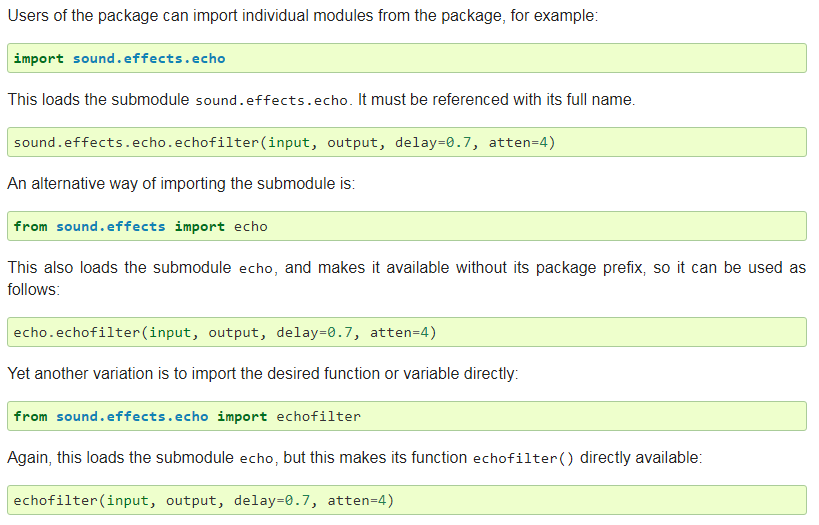

In [40]:
from urllib import request,error

def download(url):
    print('Downloading:',url)
  
    try:
        html = request.urlopen(url).read()
    except error.URLError as e:  #当出现错误时，捕获异常，返回None
        print('Dlonload error:',e.reason)
        html = None
    return html
print(download('http://httpstat.us/500'))

Downloading: http://httpstat.us/500
Dlonload error: Internal Server Error
None


In [37]:
from urllib import request
def download(url):
    print('Downloading:',url)
  
    try:
        html = request.urlopen(url).read()
    except urllib.URLError as e:  #当出现错误时，捕获异常，返回None
        print('Dlonload error:',e.reason)
        html = None
    return html.decode('utf-8')
print(download('http://example.webscraping.com/'))

Downloading: http://example.webscraping.com/
<!--[if HTML5]><![endif]-->
<!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if lt IE 7]><html class="ie ie6 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->
<!--[if IE 7]><html class="ie ie7 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->
<!--[if IE 8]><html class="ie ie8 ie-lte9 ie-lte8 no-js" lang="en-us"> <![endif]-->
<!--[if IE 9]><html class="ie9 ie-lte9 no-js" lang="en-us"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>Example web scraping website</title>
  <!--[if !HTML5]>
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
  <![endif]-->
  <!-- www.phpied.com/conditional-comments-block-downloads/ -->
  <!-- Always force latest IE rendering engine
       (even in intranet) & Chrome Frame
       Remove this if you use the .htaccess -->
	   
  <meta charset="utf-8" />

  <!-- http://dev

下载时遇到的错误经常是临时性的， 比如服务器过载时返回的503 Service Unavailable错误。对于此类错误，可以尝试重新下载.

如果服务器返回的是404 Not Found 这种错误， 则说明该网页目前并不存在， 再次尝试同样的请求一般也不会出现不同的结果。

4xx 错误发生在请求存在问题时，5xx 错误则发生在服务端存在问题时。所以， 我们只需要确保download函数在发生5xx 错误时重试下载即可。

<a href = 'https://tools.ietf.org/html/rfc7231#section-6'>HTTP错误列表</a>

In [41]:
# 支持重试下载功能
from urllib import request
from urllib import error
def download(url, num_retries=2):
    print('Downloading:', url)
    try:
        html = request.urlopen(url).read()
    except error.URLError as e:
        print('Download error:',e.reason)
        html = None
        if num_retries > 0:
            if hasattr(e, 'code') and 500 <= e.code < 600:
                # recursively retry 5xx HTTP errors
                return download(url, num_retries-1)
    return html
#print(download('http://example.webscraping.com/'))    
print(download('http://httpstat.us/500'))

Downloading: http://httpstat.us/500
Download error: Internal Server Error
Downloading: http://httpstat.us/500
Download error: Internal Server Error
Downloading: http://httpstat.us/500
Download error: Internal Server Error
None


In [ ]:
书中用的是python2.7,  try:
                     except urllib2.URLError as e.reason :

在python3.6下， 写法: from urllib import error
                     try:
                     
                     except error.URLError as e:
                     
                     print(e.reason)